In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
confusion_matrix,
accuracy_score,
precision_score,
recall_score,
f1_score,
roc_curve,
auc,
)

In [29]:
# make plot size bigger
plt.rcParams['figure.figsize']=(7,5)

In [30]:
data = {
    'Weather' : ['Sunny','Rainy','Sunny','Sunny','Rainy','Rainy','Sunny','Rainy'],
    'Windy':[0,1,0,1,0,1,0,1],
    'Play':[1,0,1,1,0,0,1,0]
}
df = pd.DataFrame(data)
df

,Weather,Windy,Play
0,Sunny,0,1
1,Rainy,1,0
2,Sunny,0,1
3,Sunny,1,1
4,Rainy,0,0
5,Rainy,1,0
6,Sunny,0,1
7,Rainy,1,0


In [31]:
# Encode categorical feature
df['Weather_num'] = df['Weather'].map({'Sunny':1,'Rainy':0})
df

,Weather,Windy,Play,Weather_num
0,Sunny,0,1,1
1,Rainy,1,0,0
2,Sunny,0,1,1
3,Sunny,1,1,1
4,Rainy,0,0,0
5,Rainy,1,0,0
6,Sunny,0,1,1
7,Rainy,1,0,0


In [32]:
X = df[['Weather_num','Windy']]
y = df['Play']
y

0    1
1    0
2    1
3    1
4    0
5    0
6    1
7    0
Name: Play, dtype: int64

In [33]:
# train the tree
tree = DecisionTreeClassifier(max_depth=3,random_state=42)
tree.fit(X,y)
tree

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


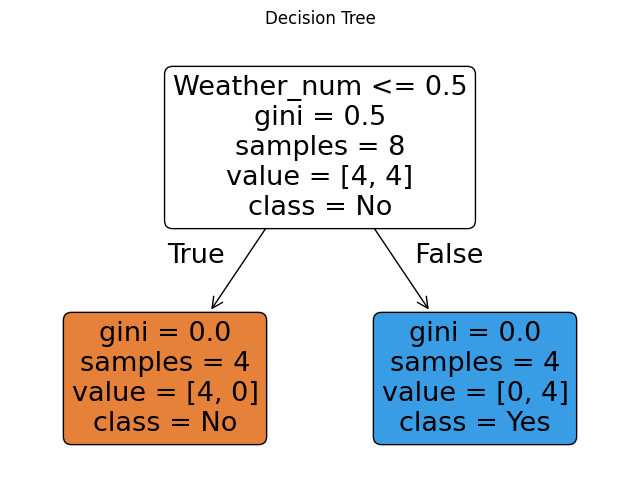

In [34]:
# visualize the tree
plt.figure(figsize=(8,6))
plot_tree(tree,feature_names=['Weather_num','Windy'],class_names=['No','Yes'],filled=True,rounded=True)
plt.title('Decision Tree')
plt.show()

In [41]:
# Example: Sunny(1), Not Windy(0)
example_1 = pd.DataFrame([[1,0]],columns=['Weather_num','Windy'])
pred_1 = tree.predict(example_1)[0]
print('Sunny, Not windy->Play prediction:',pred_1)

# Example: Rainy(0), Windy(1)
example_2 = pd.DataFrame([[0,1]],columns=['Weather_num','Windy'])
pred_2 = tree.predict(example_2)[0]
print('Sunny, Not windy->Play prediction:',pred_2)

Sunny, Not windy->Play prediction: 1
Sunny, Not windy->Play prediction: 0


In [48]:
# Creating a larger synthetic dataset
from sklearn.datasets import make_classification
X,y = make_classification(
    n_samples=400, # no of data-points
    n_features=5, # no of features
    n_informative=3, # no of releveant features
    n_redundant=0,# no strong correlation among the features
    n_classes=2, # target variable
    random_state=42 # every time we will get the similar random dataset
)
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)
X_train.shape,X_test.shape

((280, 5), (120, 5))

In [54]:
# Train a deep tree vs Pruned tree
deep_tree = DecisionTreeClassifier(random_state=42)
deep_tree.fit(X_train,y_train)

pruned_tree = DecisionTreeClassifier(random_state=42, max_depth=3)
pruned_tree.fit(X_train,y_train)

y_train_pred_deep = deep_tree.predict(X_train)
y_test_pred_deep = deep_tree.predict(X_test)

y_train_pred_pruned = pruned_tree.predict(X_train)
y_test_pred_pruned = pruned_tree.predict(X_test)
print('Deep tree train accuracy->',accuracy_score(y_train,y_train_pred_deep))
print('Deep tree test accuracy->',accuracy_score(y_test,y_test_pred_deep))


print('Pruned tree train accuracy->',accuracy_score(y_train,y_train_pred_pruned))
print('Pruned tree test accuracy->',accuracy_score(y_test,y_test_pred_pruned))



Deep tree train accuracy-> 1.0
Deep tree test accuracy-> 0.8833333333333333
Pruned tree test accuracy-> 0.9035714285714286
Pruned tree test accuracy-> 0.8916666666666667


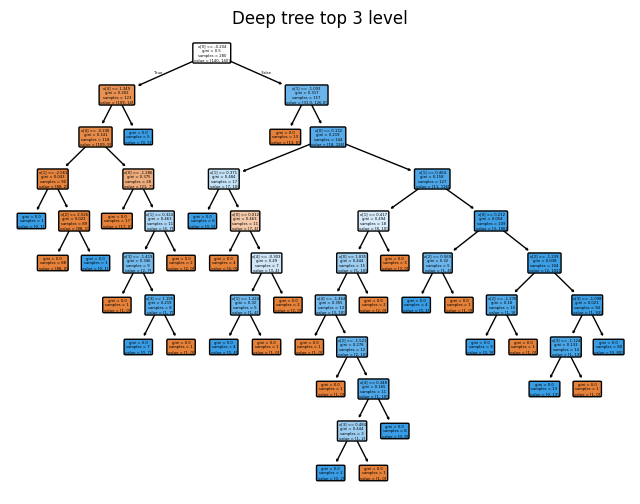

In [59]:
# Visual comparison between deep-tree vs pruned tree
plt.figure(figsize=(8,6))
plot_tree(deep_tree,filled=True,rounded=True)
plt.title('Deep tree top 3 level')
plt.show()

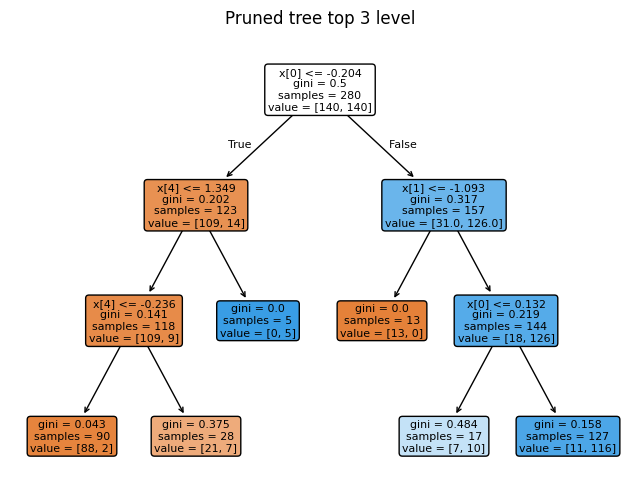

In [60]:
plt.figure(figsize=(8,6))
plot_tree(pruned_tree,filled=True,rounded=True)
plt.title('Pruned tree top 3 level')
plt.show()